In [1]:
import json
import pandas as pd

In [4]:
path = "/Users/jessicazhang/Desktop/Judging-the-Judges/result/evaluation_results.jsonl" 
rows = []
with open(path, "r", encoding="utf-8") as f:
    for line in f:
        rows.append(json.loads(line))

df = pd.DataFrame(rows)
print("n_rows:", len(df))
print("columns:", df.columns.tolist())
df.head(2)

n_rows: 1305
columns: ['Term', 'Major', 'Comparison', 'Prompt_A', 'Prompt_B', 'Explanation_A', 'Explanation_B', 'Winner', 'Judgment_AB', 'Judgment_BA', 'Reasoning']


,Term,Major,Comparison,Prompt_A,Prompt_B,Explanation_A,Explanation_B,Winner,Judgment_AB,Judgment_BA,Reasoning
0,Big O notation,Artificial Intelligence,5steps vs academic,5steps,academic,1) One-sentence definition\nBig O notation exp...,"Definition and purpose\n- Let f, g: N → R_+ de...",A,"{'winner': 'A', 'reasoning': 'Explanation A is...","{'winner': 'B', 'reasoning': 'Explanation B is...","Combined from (5steps,academic): A, (academic,..."
1,Big O notation,Artificial Intelligence,5steps vs baseline,5steps,baseline,1) One-sentence definition\nBig O notation exp...,Big O notation is a way to describe how the am...,tie,"{'winner': 'B', 'reasoning': 'For a typical no...","{'winner': 'B', 'reasoning': 'B provides a exp...","Combined from (5steps,baseline): B, (baseline,..."


In [5]:
print("n_domains:", df["Major"].nunique())
display(df["Major"].value_counts().head(15))

prompts = pd.concat([df["Prompt_A"], df["Prompt_B"]], axis=0)
print("unique prompts:", sorted(prompts.unique()))
display(prompts.value_counts())


n_domains: 3


Major
Artificial Intelligence    450
Statistics                 450
Computer Science           405
Name: count, dtype: int64

unique prompts: ['5step_round2', '5steps', 'Highly_formal_academic_round2', 'academic', 'baseline', 'baseline_round2', 'casual', 'casual_round2', 'level2_multi_aspect', 'level2_multi_aspect_round2']


5steps                           261
academic                         261
baseline                         261
casual                           261
5step_round2                     261
Highly_formal_academic_round2    261
baseline_round2                  261
casual_round2                    261
level2_multi_aspect              261
level2_multi_aspect_round2       261
Name: count, dtype: int64

In [6]:
def to_long(df):
    a = df[["Term", "Major", "Prompt_A", "Prompt_B", "Winner"]].copy()
    b = a.copy()

    a["prompt"] = a["Prompt_A"]
    a["opponent"] = a["Prompt_B"]
    a["won"] = (a["Winner"] == "A").astype(int)

    b["prompt"] = b["Prompt_B"]
    b["opponent"] = b["Prompt_A"]
    b["won"] = (b["Winner"] == "B").astype(int)

    out = pd.concat([a[["Term","Major","prompt","opponent","won"]],
                     b[["Term","Major","prompt","opponent","won"]]], ignore_index=True)
    return out

long_df = to_long(df)
print("long rows:", len(long_df))
long_df.head(6)


long rows: 2610


,Term,Major,prompt,opponent,won
0,Big O notation,Artificial Intelligence,5steps,academic,1
1,Big O notation,Artificial Intelligence,5steps,baseline,0
2,Big O notation,Artificial Intelligence,5steps,casual,0
3,Big O notation,Artificial Intelligence,5steps,level2_multi_aspect,0
4,Big O notation,Artificial Intelligence,academic,baseline,0
5,Big O notation,Artificial Intelligence,academic,casual,0


In [7]:
summary = (long_df
           .groupby(["Major", "prompt"])
           .agg(wins=("won","sum"), total=("won","count"))
           .reset_index())
summary["win_rate"] = summary["wins"] / summary["total"]

domain_totals = long_df.groupby("Major").size().sort_values(ascending=False)
display(domain_totals.head(15))

top_domains = domain_totals.head(6).index
display(summary[summary["Major"].isin(top_domains)]
        .sort_values(["Major","win_rate"], ascending=[True, False]))


Major
Artificial Intelligence    900
Statistics                 900
Computer Science           810
dtype: int64

,Major,prompt,wins,total,win_rate
7,Artificial Intelligence,casual_round2,79,90,0.877778
9,Artificial Intelligence,level2_multi_aspect_round2,77,90,0.855556
6,Artificial Intelligence,casual,62,90,0.688889
5,Artificial Intelligence,baseline_round2,49,90,0.544444
8,Artificial Intelligence,level2_multi_aspect,42,90,0.466667
0,Artificial Intelligence,5step_round2,28,90,0.311111
4,Artificial Intelligence,baseline,27,90,0.300000
1,Artificial Intelligence,5steps,21,90,0.233333
2,Artificial Intelligence,Highly_formal_academic_round2,10,90,0.111111
3,Artificial Intelligence,academic,0,90,0.000000


In [8]:
gap_df = (summary
          .groupby("prompt")
          .agg(max_win=("win_rate","max"),
               min_win=("win_rate","min"))
          .reset_index())

gap_df["gap"] = gap_df["max_win"] - gap_df["min_win"]

gap_df.sort_values("gap", ascending=False)


,prompt,max_win,min_win,gap
6,casual,0.802469,0.688889,0.113580
7,casual_round2,0.877778,0.788889,0.088889
8,level2_multi_aspect,0.543210,0.455556,0.087654
0,5step_round2,0.377778,0.311111,0.066667
5,baseline_round2,0.544444,0.477778,0.066667
9,level2_multi_aspect_round2,0.855556,0.790123,0.065432
4,baseline,0.358025,0.300000,0.058025
1,5steps,0.271605,0.233333,0.038272
2,Highly_formal_academic_round2,0.111111,0.111111,0.000000
3,academic,0.000000,0.000000,0.000000


In [10]:
import statsmodels.formula.api as smf

model = smf.logit("won ~ C(prompt) + C(Major) + C(prompt):C(Major)", data=long_df).fit()

print(model.summary())


         Current function value: 0.500724
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                    won   No. Observations:                 2610
Model:                          Logit   Df Residuals:                     2580
Method:                           MLE   Df Model:                           29
Date:                Tue, 10 Feb 2026   Pseudo R-squ.:                  0.2711
Time:                        22:12:21   Log-Likelihood:                -1306.9
converged:                      False   LL-Null:                       -1793.0
Covariance Type:            nonrobust   LLR p-value:                6.569e-186
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
Intercept             

/Users/jessicazhang/Desktop/Judging-the-Judges/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [11]:
import scipy.stats as stats
pivot = summary.pivot(index="prompt", columns="Major", values="win_rate")
for d1 in pivot.columns:
    for d2 in pivot.columns:
        if d1 < d2:
            tau, p = stats.kendalltau(pivot[d1], pivot[d2])
            print(f"{d1} vs {d2}: tau={tau:.3f}, p={p:.4g}")


Artificial Intelligence vs Computer Science: tau=0.899, p=0.000328
Artificial Intelligence vs Statistics: tau=0.956, p=5.511e-06
Computer Science vs Statistics: tau=0.854, p=0.0006437


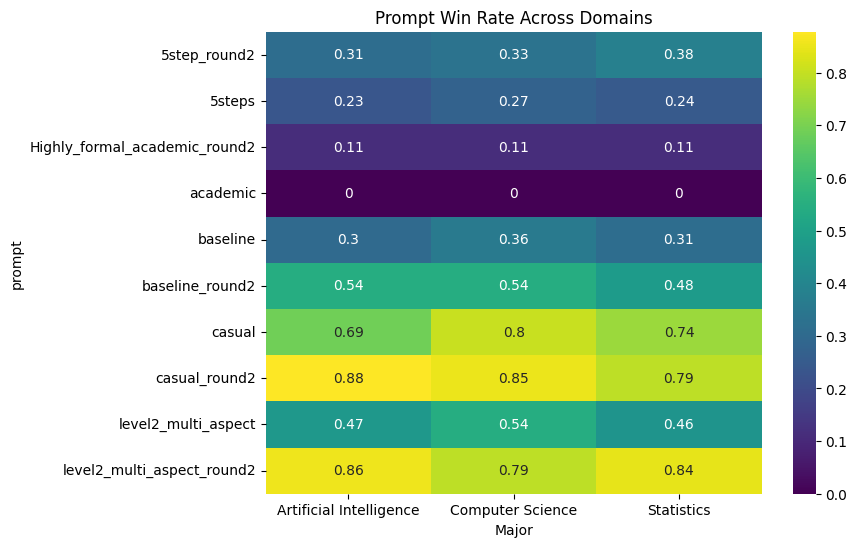

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot = summary.pivot(index="prompt", columns="Major", values="win_rate")

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, cmap="viridis")
plt.title("Prompt Win Rate Across Domains")
plt.show()


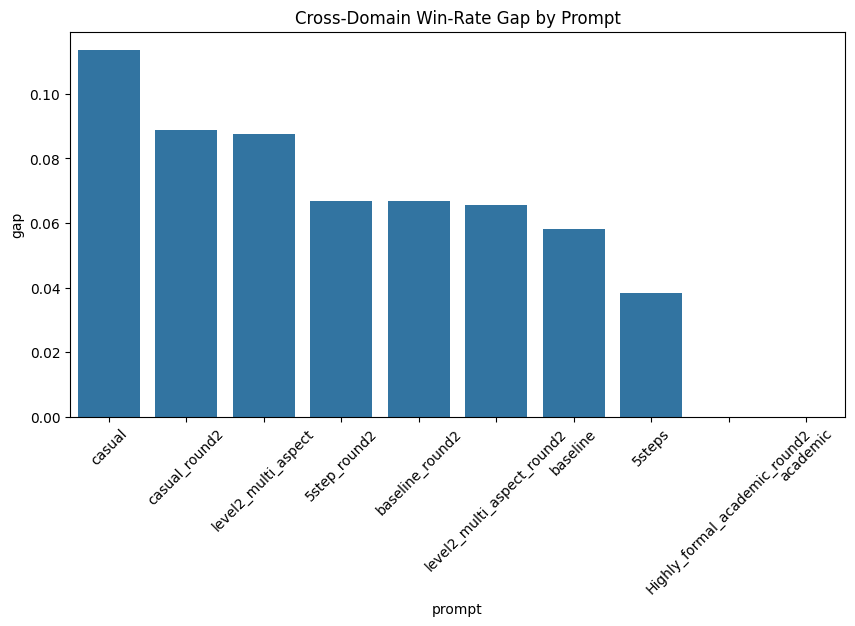

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(data=gap_df.sort_values("gap", ascending=False),
            x="prompt", y="gap")
plt.xticks(rotation=45)
plt.title("Cross-Domain Win-Rate Gap by Prompt")
plt.show()


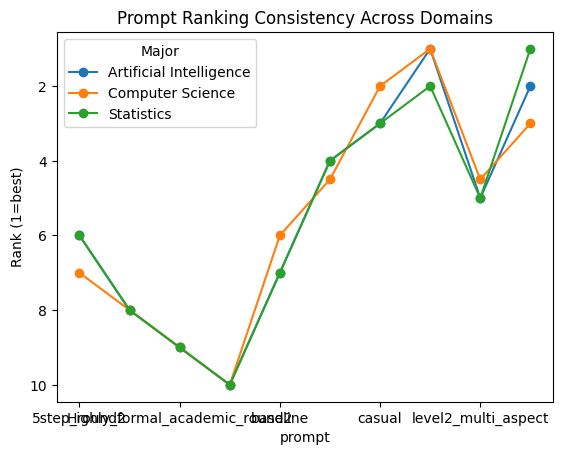

In [21]:
rank_df = pivot.rank(ascending=False)

rank_df.plot(marker='o')
plt.title("Prompt Ranking Consistency Across Domains")
plt.ylabel("Rank (1=best)")
plt.gca().invert_yaxis()
plt.show()



In [22]:
overall = (long_df
           .groupby("prompt")
           .agg(wins=("won","sum"), total=("won","count"))
           .reset_index())
overall["win_rate"] = overall["wins"] / overall["total"]

overall.sort_values("win_rate", ascending=False)


,prompt,wins,total,win_rate
7,casual_round2,219,261,0.839080
9,level2_multi_aspect_round2,217,261,0.831418
6,casual,194,261,0.743295
5,baseline_round2,136,261,0.521073
8,level2_multi_aspect,127,261,0.486590
0,5step_round2,89,261,0.340996
4,baseline,84,261,0.321839
1,5steps,65,261,0.249042
2,Highly_formal_academic_round2,29,261,0.111111
3,academic,0,261,0.000000


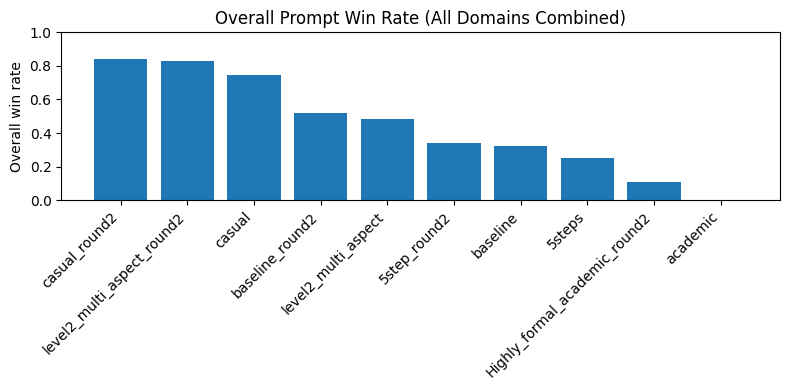

In [23]:
import matplotlib.pyplot as plt

tmp = overall.sort_values("win_rate", ascending=False)

plt.figure(figsize=(8,4))
plt.bar(tmp["prompt"], tmp["win_rate"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Overall win rate")
plt.title("Overall Prompt Win Rate (All Domains Combined)")
plt.ylim(0,1)
plt.tight_layout()
plt.show()
